In [1]:
# Importing libraries
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

import math

from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
pwd

'C:\\Users\\USER\\Desktop\\KAGGLE DATASETS\\Time Series Journey\\DJIA 30 Stock Time Series\\Notebooks'

In [3]:
#Importing the dataset
data = pd.read_csv(
    'C:\\Users\\USER\\Desktop\\KAGGLE DATASETS\\Time Series Journey\\DJIA 30 Stock Time Series\\GOOGL_2006-01-01_to_2018-01-01.csv',
    index_col = 'Date', parse_dates=True
)

data.head(25)

#data.index.freq = '??????'

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL
2006-01-10,232.44,235.36,231.25,235.11,9104719,GOOGL
2006-01-11,235.87,237.79,234.82,236.05,9008664,GOOGL
2006-01-12,237.10,237.73,230.98,232.05,10125212,GOOGL
2006-01-13,232.39,233.68,231.04,233.36,7660220,GOOGL


In [4]:
data = data.asfreq('B')
data.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450.0,GOOGL
2006-01-04,222.17,224.70,220.09,222.84,15292353.0,GOOGL
2006-01-05,223.22,226.00,220.97,225.85,10815661.0,GOOGL
2006-01-06,228.66,235.49,226.85,233.06,17759521.0,GOOGL
2006-01-09,233.44,236.94,230.70,233.68,12795837.0,GOOGL


In [5]:
#check frequency of the series
print(data.index.freq)

<BusinessDay>


In [6]:
#check for the frequency to use for indexing

print(pd.infer_freq(data.index))

B


In [7]:
data.nunique()

Open      2880
High      2855
Low       2875
Close     2919
Volume    3019
Name         1
dtype: int64

In [8]:
data.drop('Name', axis=1, inplace=True)

In [9]:
data.isnull().sum()

Open      110
High      110
Low       110
Close     110
Volume    110
dtype: int64

In [10]:
data.interpolate(method='linear', axis=0, inplace=True)

data.isnull().sum().max()

0

In [11]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [12]:
temperatures = pd.read_csv(
    'C:\\Users\\USER\\Desktop\\KAGGLE DATASETS\\Time Series Journey\\DJIA 30 Stock Time Series\\daily-minimum-temperatures-in-me.csv',
    index_col = 'Date', parse_dates=True
)

temperatures.head()

,"Daily minimum temperatures in Melbourne, Australia, 1981-1990"
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [13]:
temperatures.rename(columns={'Daily minimum temperatures in Melbourne, Australia, 1981-1990' : 'Daily Min. Temp.'}, inplace=True)

In [14]:
temperatures.head()

,Daily Min. Temp.
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [15]:
temperatures['Daily Min. Temp.'].dtype

dtype('O')

In [16]:
temperatures['Daily Min. Temp.'].str

In [17]:
#data is dirty --- contains ? in it

temperatures['Daily Min. Temp.'] = temperatures['Daily Min. Temp.'].map(lambda x: x.replace('?', ''))

temperatures['Daily Min. Temp.'] = temperatures['Daily Min. Temp.'].astype(float)

In [18]:
temperatures.shape

(3650, 1)

In [19]:
print(temperatures.index.freq)

None


In [20]:
temperatures.asfreq('D').shape

(3652, 1)

In [21]:
temperatures.asfreq('D')

where_null = np.where(temperatures.asfreq('D').isnull())
where_null

(array([1460, 2921], dtype=int64), array([0, 0], dtype=int64))

In [22]:
temperatures.asfreq('D').iloc[[1460,2921], :]

,Daily Min. Temp.
Date,
1984-12-31,NaN
1988-12-31,NaN


In [23]:
temperatures = temperatures.asfreq('D')
temperatures.interpolate(method='linear', axis=0, inplace=True)

In [24]:
temperatures.shape

(3652, 1)

In [25]:
temperatures.iloc[[1460,2921], :]

,Daily Min. Temp.
Date,
1984-12-31,14.85
1988-12-31,14.20


<h3>Data Visualization</h3>

#GOOGLE Stocks

Text(0, 0.5, 'Price in USD')

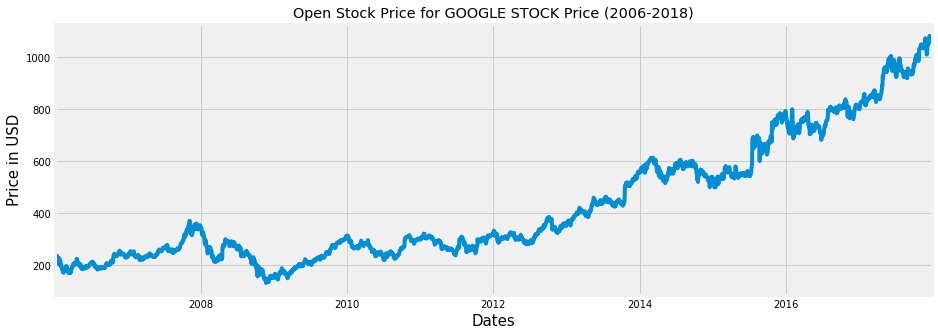

In [26]:
ax = data['Open'].plot(
    title='Open Stock Price for GOOGLE STOCK Price (2006-2018)', figsize=(14, 5)
);

ax.set_xlabel('Dates', size=15)
ax.set_ylabel('Price in USD', size=15)

Text(0, 0.5, 'Price in USD')

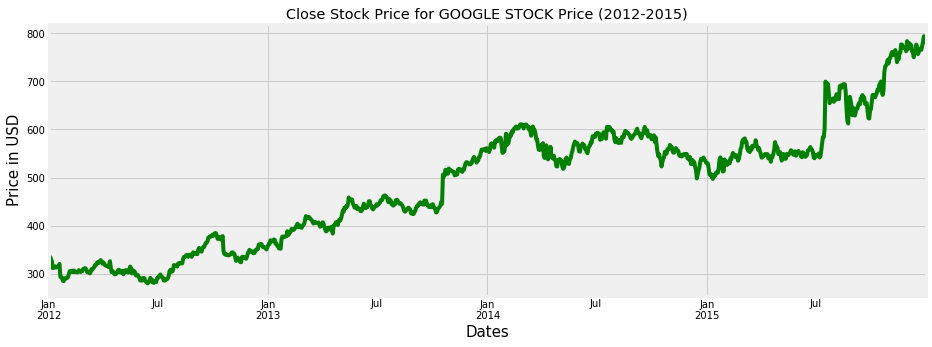

In [27]:
#plotting close price for 2012-2015?

ax = data['Close']['2012':'2015'].plot(
    title='Close Stock Price for GOOGLE STOCK Price (2012-2015)', figsize=(14, 5), c='green'
);

ax.set_xlabel('Dates', size=15)
ax.set_ylabel('Price in USD', size=15)

Text(0, 0.5, 'Price in USD')

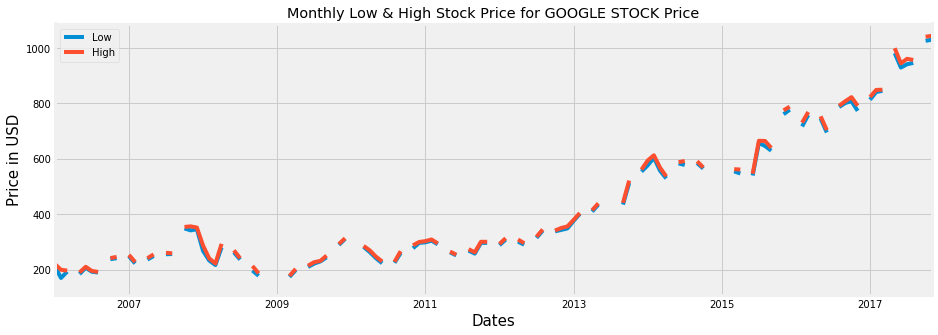

In [28]:
#changing the frequency of the data to monthly form

ax = data[['Low', 'High']].asfreq('M').plot(
    title='Monthly Low & High Stock Price for GOOGLE STOCK Price', figsize=(14, 5)
);

ax.set_xlabel('Dates', size=15)
ax.set_ylabel('Price in USD', size=15)

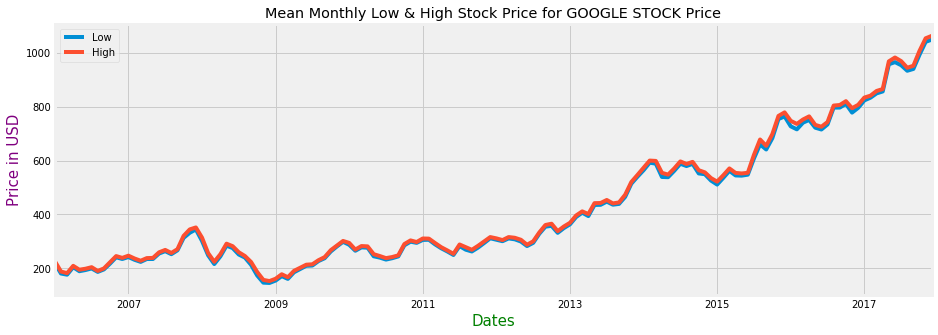

In [29]:
ax = data[['Low', 'High']].resample('M').mean().plot(
    title='Mean Monthly Low & High Stock Price for GOOGLE STOCK Price', figsize=(14, 5)
);

ax.set_xlabel('Dates', size=15, color='green')
ax.set_ylabel('Price in USD', size=15, color='purple')

plt.savefig('Monthly_Google_Low_High_Price.png')

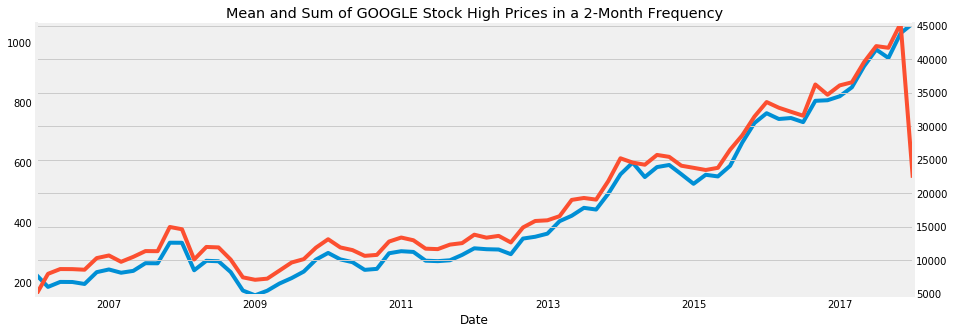

In [30]:
#data['High'].resample('2M').agg(['mean', 'sum']).plot(
#    figsize=(14, 5)
#).autoscale(axis='both', tight=True)

#since both guys have different scales;

data['High'].resample('2M').mean().plot(
    title='Mean and Sum of GOOGLE Stock High Prices in a 2-Month Frequency', figsize=(14, 5)
).autoscale(axis='both', tight=True)

data['High'].resample('2M').sum().plot(secondary_y=True).autoscale(axis='both', tight=True)

#ax.set_xlabel('Dates', size=15, color='green')
#ax.set_ylabel('Price in USD', size=15, color='purple')

#plt.savefig('Monthly_Google_Low_High_Price.png')

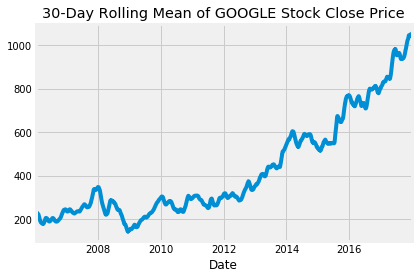

In [31]:
data['Close'].rolling('30D').mean().plot(
    title='30-Day Rolling Mean of GOOGLE Stock Close Price');

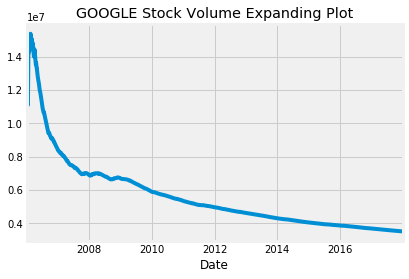

In [32]:
data['Volume'].expanding().mean().plot(title='GOOGLE Stock Volume Expanding Plot');

In [33]:
#if I resample on a GOOGLE stocks data to Weekly basis, I'll compute the prices for the 5 trading 
#days:
#data.resample('W').mean()

#Daily Temperature Dataset

Text(0.5, 0, 'Year')

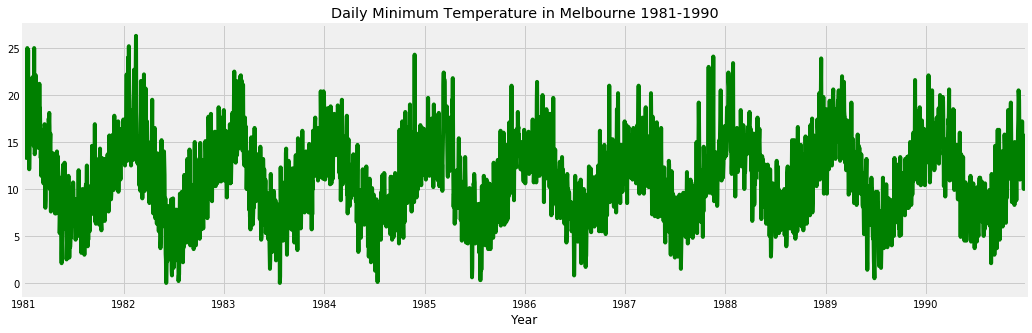

In [34]:
ax = temperatures['Daily Min. Temp.'].plot(
    title='Daily Minimum Temperature in Melbourne 1981-1990', figsize=(16, 5), c='green'
);

ax.set_xlabel('Year')

In [35]:
#the dataset shows a strong seasonality?

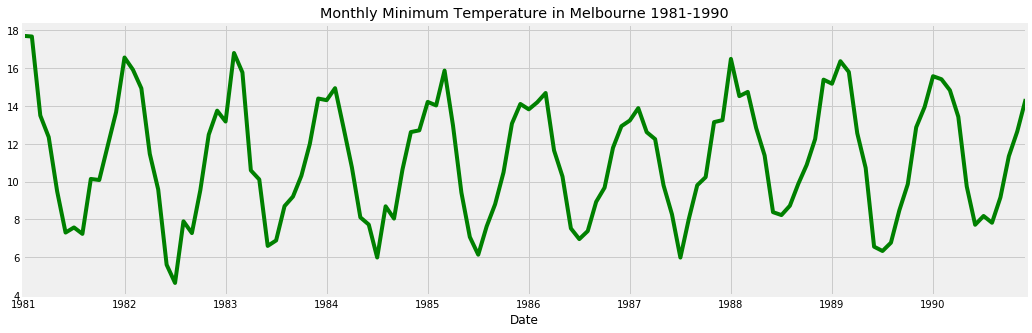

In [36]:
temperatures['Daily Min. Temp.'].resample('M').mean().plot(
    title='Monthly Minimum Temperature in Melbourne 1981-1990', figsize=(16, 5), c='green'
);

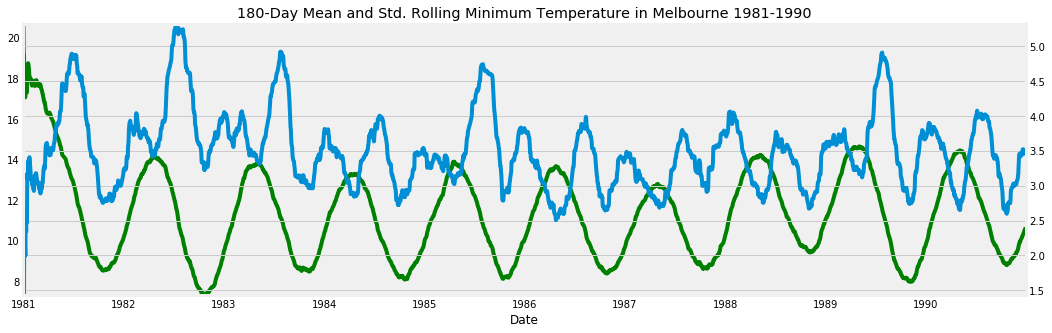

In [37]:
temperatures['Daily Min. Temp.'].rolling('180D').mean().plot(
    title='180-Day Mean and Std. Rolling Minimum Temperature in Melbourne 1981-1990', figsize=(16, 5), c='green'
).autoscale(axis='both', tight=True)

temperatures['Daily Min. Temp.'].rolling('180D').std().plot(secondary_y=True).autoscale(axis='both', tight=True);

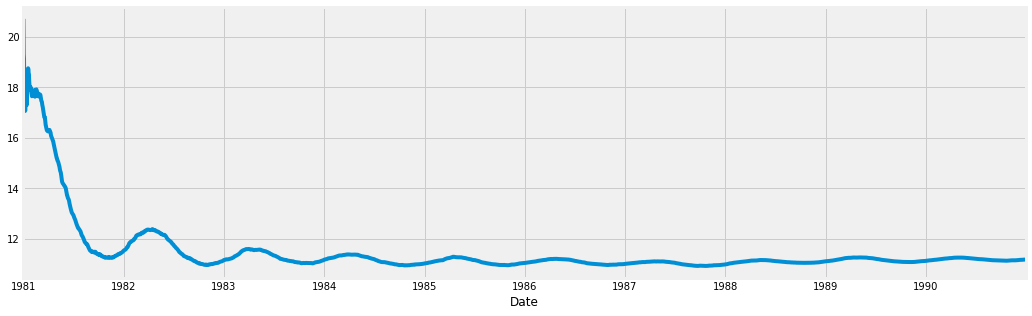

In [38]:
temperatures['Daily Min. Temp.'].expanding().mean().plot(figsize=(16, 5))

<h3>Creating Useful Functions for Analysis</h3>

In [39]:
#metrics

def metrics(actual, pred):
    rmse = math.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    
    return rmse, mae

In [40]:
#acf and pacf

from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def tsplot2(y, title, lags=None, figsize=(12, 8)):
    fig = plt.figure(figsize=figsize)
    layout=(2,2)
    
    ts_ax = plt.subplot2grid(layout, (0,0))
    hist_ax = plt.subplot2grid(layout, (0,1))
    acf_ax = plt.subplot2grid(layout, (1,0))
    pacf_ax = plt.subplot2grid(layout, (1,1))
    
    y.plot(ax=ts_ax)
    ts_ax.set_title(title, fontsize=14, fontweight='bold')
    
    y.plot(ax=hist_ax, kind='hist', bins=25)
    hist_ax.set_title('Histogram')
    
    plot_acf(y, lags=lags, ax=acf_ax)
    acf_ax.axhline(y=-1.96/np.sqrt(len(y)), linestyle='--', color='gray')
    acf_ax.axhline(y=1.96/np.sqrt(len(y)), linestyle='--', color='gray')
    
    
    
    plot_pacf(y, lags=lags, ax=pacf_ax)
    pacf_ax.axhline(y=-1.96/np.sqrt(len(y)), linestyle='--', color='gray')
    pacf_ax.axhline(y=1.96/np.sqrt(len(y)), linestyle='--', color='gray')
    
    
    [ax.set_xlim(0) for ax in [acf_ax, pacf_ax]]
    sns.despine()
    
    return ts_ax, acf_ax, pacf_ax

In [41]:
#Augmented Dickey-Fuller Test

from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [42]:
#KPSS Test
from statsmodels.tsa.stattools import kpss

def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)
    
    if (kpsstest[0] > kpss_output[3]) & (kpsstest[0] > kpss_output[4]) & (kpsstest[0] > kpss_output[5]) & (kpsstest[0] > kpss_output[6]):
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data is non-stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data is stationary")

<h3>Applying Statistical Stationary Tests to GOOGLE Stock Open and Close Prices</h3>

#ADF Test

In [43]:
adf_test(data['Open'])

Augmented Dickey-Fuller Test: 
ADF test statistic         1.080175
p-value                    0.995044
# lags used                0.000000
# observations          3128.000000
critical value (1%)       -3.432442
critical value (5%)       -2.862464
critical value (10%)      -2.567262
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [44]:
adf_test(data['Close'])

Augmented Dickey-Fuller Test: 
ADF test statistic         1.158045
p-value                    0.995683
# lags used                3.000000
# observations          3125.000000
critical value (1%)       -3.432444
critical value (5%)       -2.862465
critical value (10%)      -2.567263
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


#KPSS Test

In [45]:
kpss_test(data['Open'])

Results of KPSS Test:
Test Statistic            8.888998
p-value                   0.010000
Lags Used                29.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
Strong evidence against the null hypothesis
Reject the null hypothesis
Data is non-stationary


C:\Users\USER\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1708: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


In [46]:
kpss_test(data['Close'])

Results of KPSS Test:
Test Statistic            8.890139
p-value                   0.010000
Lags Used                29.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
Strong evidence against the null hypothesis
Reject the null hypothesis
Data is non-stationary


C:\Users\USER\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1708: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


In [47]:
#applying differencing
adf_test(data['Open'].diff())  #first order differencing makes Open stationary for ADF

Augmented Dickey-Fuller Test: 
ADF test statistic       -55.968367
p-value                    0.000000
# lags used                0.000000
# observations          3127.000000
critical value (1%)       -3.432443
critical value (5%)       -2.862465
critical value (10%)      -2.567262
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [48]:
adf_test(data['Close'].diff())   #first order differencing makes Close stationary for ADF

Augmented Dickey-Fuller Test: 
ADF test statistic       -32.745785
p-value                    0.000000
# lags used                2.000000
# observations          3125.000000
critical value (1%)       -3.432444
critical value (5%)       -2.862465
critical value (10%)      -2.567263
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [49]:
kpss_test(data['Open'].diff().dropna())    ##first order differencing makes Open stationary for KPSS

Results of KPSS Test:
Test Statistic            0.401172
p-value                   0.076650
Lags Used                29.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data is stationary


In [50]:
kpss_test(data['Close'].diff().dropna())   #first order differencing makes Close stationary for KPSS

Results of KPSS Test:
Test Statistic            0.407497
p-value                   0.073924
Lags Used                29.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data is stationary


In [51]:
#applying log transformation differencing
adf_test(np.log(data['Open']).diff())

Augmented Dickey-Fuller Test: 
ADF test statistic       -57.259765
p-value                    0.000000
# lags used                0.000000
# observations          3127.000000
critical value (1%)       -3.432443
critical value (5%)       -2.862465
critical value (10%)      -2.567262
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [52]:
kpss_test(np.log(data['Open']).diff().dropna())

Results of KPSS Test:
Test Statistic            0.096577
p-value                   0.100000
Lags Used                29.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data is stationary


C:\Users\USER\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1710: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [53]:
#for volume

adf_test(data['Volume'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -5.852746e+00
p-value                 3.557713e-07
# lags used             2.900000e+01
# observations          3.099000e+03
critical value (1%)    -3.432462e+00
critical value (5%)    -2.862473e+00
critical value (10%)   -2.567267e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [54]:
#for minimu temp.dataset

adf_test(temperatures['Daily Min. Temp.'])

Augmented Dickey-Fuller Test: 
ADF test statistic        -4.441070
p-value                    0.000251
# lags used               20.000000
# observations          3631.000000
critical value (1%)       -3.432152
critical value (5%)       -2.862336
critical value (10%)      -2.567194
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


#Creating plots for stationary series

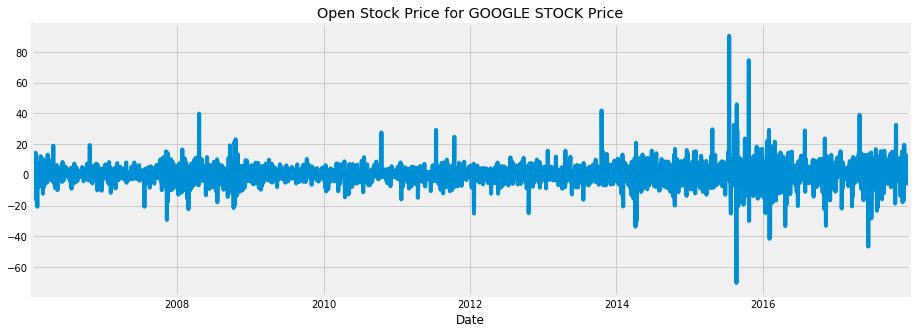

In [55]:
data['Open'].diff().dropna().plot(
    title='Open Stock Price for GOOGLE STOCK Price', figsize=(14, 5)
);

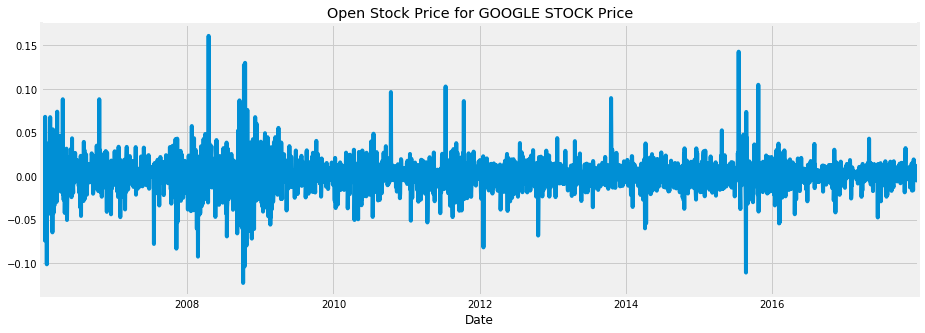

In [56]:
np.log(data['Open']).diff().dropna().plot(
    title='Open Stock Price for GOOGLE STOCK Price', figsize=(14, 5)
);

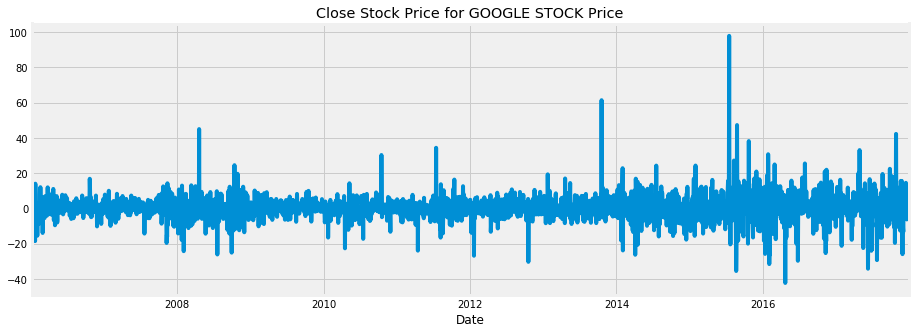

In [57]:
data['Close'].diff().dropna().plot(
    title='Close Stock Price for GOOGLE STOCK Price', figsize=(14, 5)
);

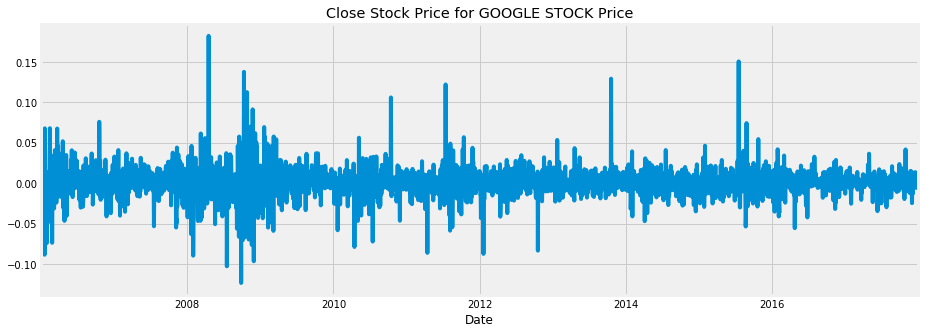

In [58]:
np.log(data['Close']).diff().dropna().plot(
    title='Close Stock Price for GOOGLE STOCK Price', figsize=(14, 5)
);

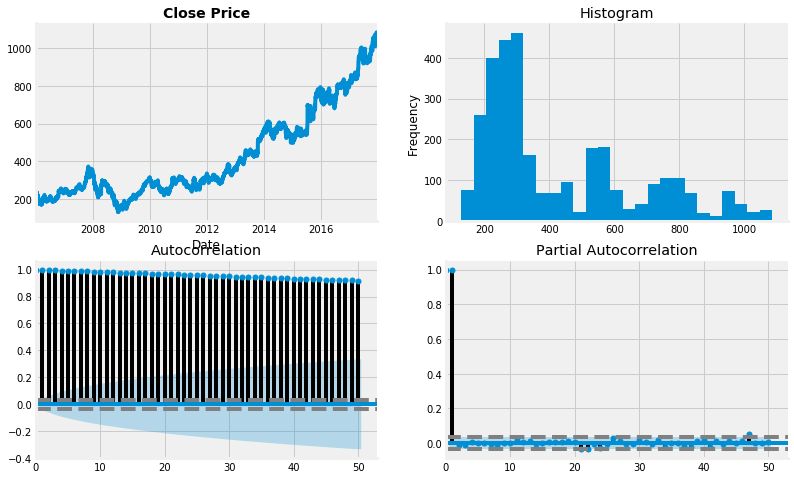

In [59]:
#before first-order differencing for GOOGLE Stock Open Price

tsplot2(data['Close'], 'Close Price', lags=50, figsize=(12, 8));

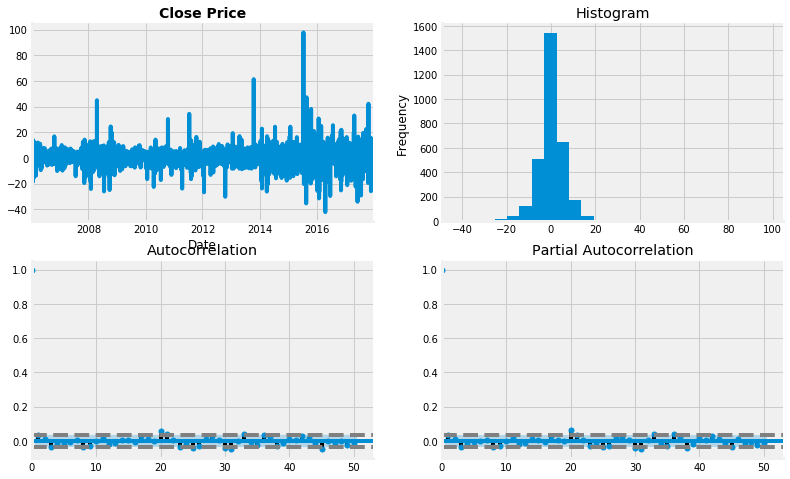

In [60]:
#after first-order differencing for GOOGLE Stock Open Price

tsplot2(data['Close'].diff().dropna(), 'Close Price', lags=50, figsize=(12, 8));

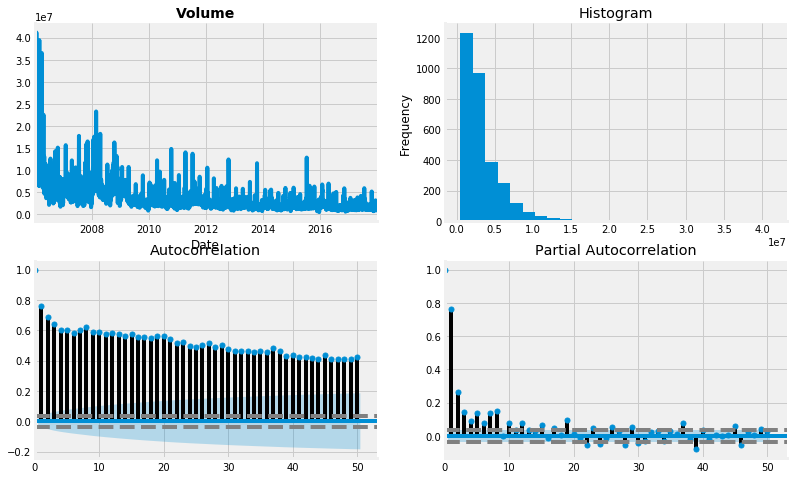

In [61]:
#GOOGLE Stock Volume --- Stationary Series

tsplot2(data['Volume'], 'Volume', lags=50, figsize=(12, 8));

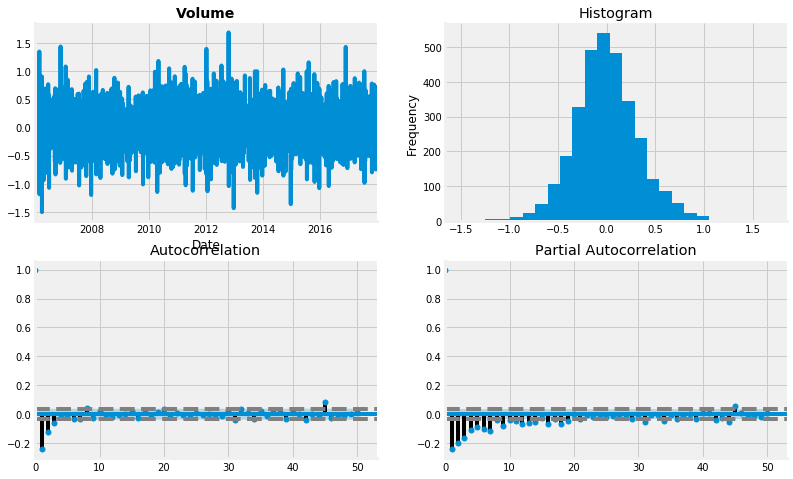

In [62]:
#take log transformation for GOOGLE Stock Volume

tsplot2(np.log(data['Volume']).diff().dropna(), 'Volume', lags=50, figsize=(12, 8));

#Seasonal Decomposition

In [63]:
from statsmodels.tsa.seasonal import seasonal_decompose

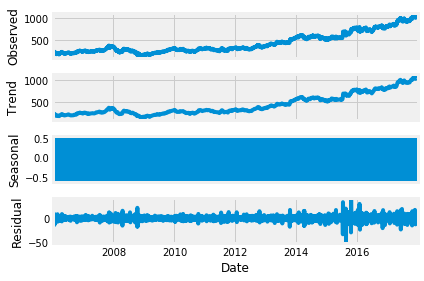

In [64]:
seasonal_decompose(data['Open']).plot();

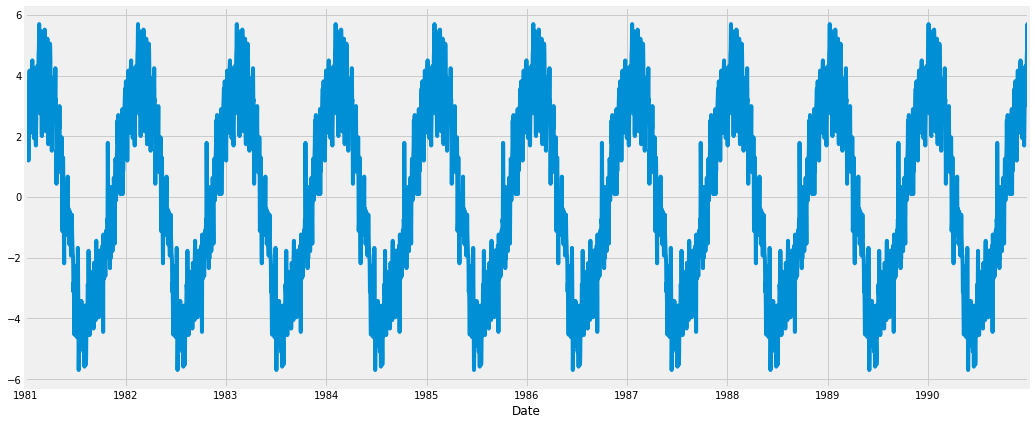

In [65]:
#for minimum temperatures dataset

seasonal_decompose(temperatures['Daily Min. Temp.'], freq=360).seasonal.plot(figsize=(16, 7));

In [66]:
#split the data into training and test set

data_transformed = data.diff().dropna()

train = data_transformed[:'2016']
test = data_transformed['2017':]

In [67]:
train_data = data[:'2016']
test_data = data['2017':]

<h2>Modelling</h2>

<h3>AR</h3>

In [68]:
from statsmodels.tsa.arima_model import ARMA

In [69]:
model = ARMA(train['Close'], order=(1,0))
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Close   No. Observations:                 2868
Model:                     ARMA(1, 0)   Log Likelihood               -9439.003
Method:                       css-mle   S.D. of innovations              6.503
Date:                Tue, 03 Mar 2020   AIC                          18884.006
Time:                        00:27:52   BIC                          18901.890
Sample:                    01-04-2006   HQIC                         18890.453
                         - 12-30-2016                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2003      0.125      1.601      0.110      -0.045       0.446
ar.L1.Close     0.0296      0.019      1.586      0.113      -0.007       0.066
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           33.7669           +0.0000j           33.7669            0.0000
-----------------------------------------------------------------------------
"""

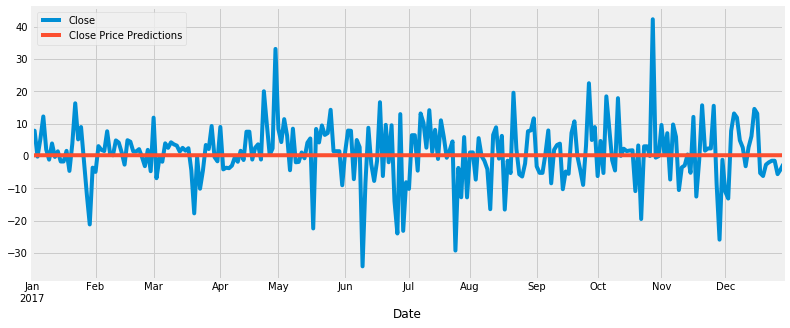

In [70]:
test['Close'].plot(legend=True, figsize=(12, 5))
res.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False).rename('Close Price Predictions').plot(legend=True)

In [71]:
train_predictions = res.predict(start=0, end=len(train)-1, dynamic=False)
test_predictions = res.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

In [72]:
ar_close_rmse, ar_close_mae = metrics(test['Close'], test_predictions)[0], metrics(test['Close'], test_predictions)[1]
print(f'Close AR RMSE: {round(ar_close_rmse, 7)}')

Close AR RMSE: 8.9363098


<h3>MA</h3>

In [73]:
model = ARMA(train['Close'], order=(0,1))
res = model.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Close   No. Observations:                 2868
Model:                     ARMA(0, 1)   Log Likelihood               -9439.025
Method:                       css-mle   S.D. of innovations              6.503
Date:                Tue, 03 Mar 2020   AIC                          18884.049
Time:                        00:28:06   BIC                          18901.934
Sample:                    01-04-2006   HQIC                         18890.497
                         - 12-30-2016                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2003      0.125      1.603      0.109      -0.045       0.445
ma.L1.Close     0.0291      0.018      1.575      0.115      -0.007       0.065
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1          -34.4116           +0.0000j           34.4116            0.5000
-----------------------------------------------------------------------------
"""

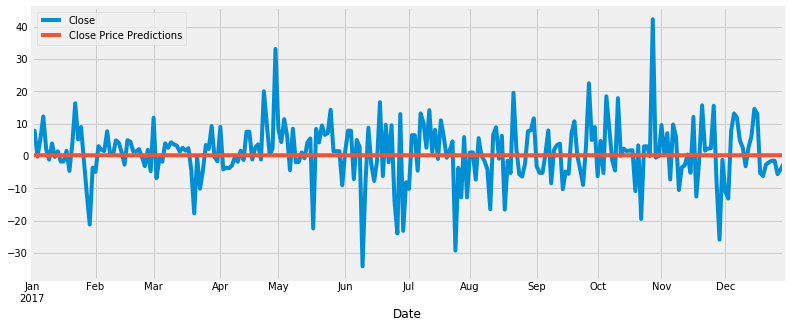

In [74]:
test['Close'].plot(legend=True, figsize=(12, 5))
res.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False).rename('Close Price Predictions').plot(legend=True)

In [75]:
train_predictions = res.predict(start=0, end=len(train)-1, dynamic=False)
test_predictions = res.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

In [76]:
ma_close_rmse, ma_close_mae = metrics(test['Close'], test_predictions)[0], metrics(test['Close'], test_predictions)[1]
print(f'Close MA RMSE: {round(ma_close_rmse, 7)}')

Close MA RMSE: 8.9362542


<h3>ARMA</h3>

In [77]:
model = ARMA(train['Close'], order=(1,1))
res = model.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Close   No. Observations:                 2868
Model:                     ARMA(1, 1)   Log Likelihood               -9438.987
Method:                       css-mle   S.D. of innovations              6.503
Date:                Tue, 03 Mar 2020   AIC                          18885.974
Time:                        00:28:19   BIC                          18909.820
Sample:                    01-04-2006   HQIC                         18894.571
                         - 12-30-2016                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2003      0.125      1.598      0.110      -0.045       0.446
ar.L1.Close     0.0824      0.294      0.281      0.779      -0.493       0.658
ma.L1.Close    -0.0527      0.294     -0.179      0.858      -0.628       0.523
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           12.1372           +0.0000j           12.1372            0.0000
MA.1           18.9829           +0.0000j           18.9829            0.0000
-----------------------------------------------------------------------------
"""

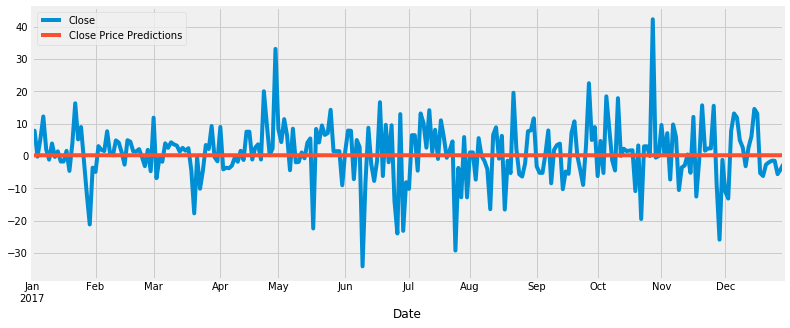

In [78]:
test['Close'].plot(legend=True, figsize=(12, 5))
res.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False).rename('Close Price Predictions').plot(legend=True)

In [79]:
train_predictions = res.predict(start=0, end=len(train)-1, dynamic=False)
test_predictions = res.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

In [80]:
arma_close_rmse, arma_close_mae = metrics(test['Close'], test_predictions)[0], metrics(test['Close'], test_predictions)[1]
print(f'Close MA RMSE: {round(arma_close_rmse, 7)}')

Close MA RMSE: 8.9363811


<h3>ARIMA</h3>

In [83]:
from pmdarima import auto_arima

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [84]:
stepwise_fit = auto_arima(
    y=train_data['Close'], start_p=0, d=None, start_q=0, max_p=6, max_d=6, max_q=6,
    seasonal=False, stationary=False, n_jobs=-1,
    trace=True,    #to show AIC, BIC info of all p,d,q combinations
    error_action='ignore',   # we don't want to know if an order does not work
    suppress_warnings=True,  # we don't want convergence warnings
    stepwise=True,  #for a bit of speed
)

stepwise_fit.summary()

Fit ARIMA: order=(0, 1, 0); AIC=18884.520, BIC=18896.443, Fit time=0.007 seconds
Fit ARIMA: order=(1, 1, 0); AIC=18884.006, BIC=18901.890, Fit time=0.108 seconds
Fit ARIMA: order=(0, 1, 1); AIC=18884.049, BIC=18901.934, Fit time=0.066 seconds
Fit ARIMA: order=(2, 1, 0); AIC=18885.866, BIC=18909.711, Fit time=0.175 seconds
Fit ARIMA: order=(1, 1, 1); AIC=18885.974, BIC=18909.820, Fit time=0.767 seconds
Fit ARIMA: order=(2, 1, 1); AIC=18886.020, BIC=18915.826, Fit time=0.826 seconds
Total fit time: 2.090 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                 2868
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -9439.003
Method:                       css-mle   S.D. of innovations              6.503
Date:                Tue, 03 Mar 2020   AIC                          18884.006
Time:                        00:32:26   BIC                          18901.890
Sample:                             1   HQIC                         18890.453
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2003      0.125      1.601      0.110      -0.045       0.446
ar.L1.D.y      0.0296      0.019      1.586      0.113      -0.007       0.066
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           33.7669           +0.0000j           33.7669            0.0000
-----------------------------------------------------------------------------
"""

In [85]:
#using ARIMA(1,1,0)
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(train_data['Close'], order=(1,1,0))
res = model.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                 2868
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -9439.003
Method:                       css-mle   S.D. of innovations              6.503
Date:                Tue, 03 Mar 2020   AIC                          18884.006
Time:                        00:32:34   BIC                          18901.890
Sample:                    01-04-2006   HQIC                         18890.453
                         - 12-30-2016                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2003      0.125      1.601      0.110      -0.045       0.446
ar.L1.D.Close     0.0296      0.019      1.586      0.113      -0.007       0.066
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           33.7669           +0.0000j           33.7669            0.0000
-----------------------------------------------------------------------------
"""

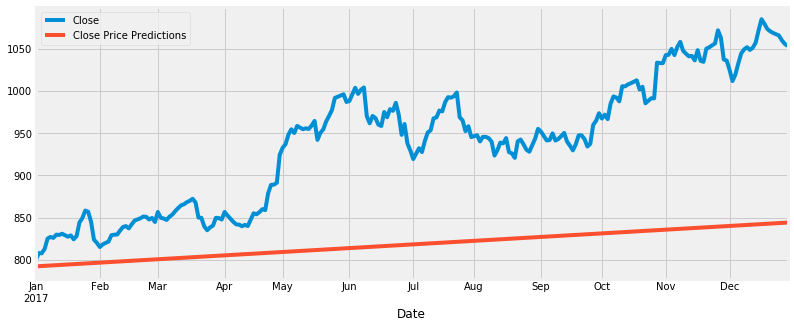

In [86]:
test_data['Close'].plot(legend=True, figsize=(12, 5))
res.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, dynamic=False, typ='levels').rename('Close Price Predictions').plot(legend=True)

In [87]:
train_predictions = res.predict(start=1, end=len(train_data)-1, dynamic=False)
#here, train predictions start from 1 beacause the ARIMA(1,1,0) model has done a FIRST-ORDER 
#differencing. If it were ARIMA(1,3,0), train predictions will start from 3 --- the differencing is
#done in such a way that the values with NaN are cut off internally





test_predictions = res.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, dynamic=False)

In [88]:
arima_close_rmse, arima_close_mae = metrics(test['Close'], test_predictions)[0], metrics(test['Close'], test_predictions)[1]
print(f'Close MA RMSE: {round(arima_close_rmse, 7)}')

Close MA RMSE: 8.9363098


In [89]:
#from the above, we see that the AR(1) model with Open price first-differenced gives the same result 
#as ARIMA(1,1,0)!!!  However the plots differ a bit because the AR model has its values differenced,
#while the ARIMA(1,1,0) has its fitted value and predictions(with typ='levels')

<h3>SARIMA</h3>

In [90]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

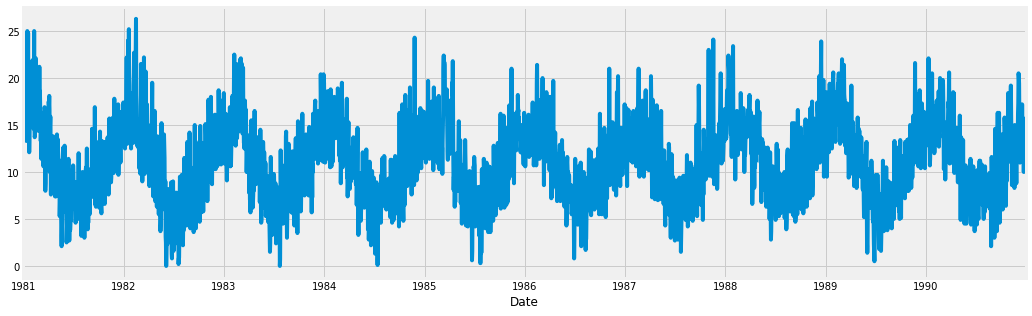

In [91]:
temperatures['Daily Min. Temp.'].plot(figsize=(16, 5));

In [92]:
temp_train = temperatures[:'2016']
temp_test = temperatures['2017':]

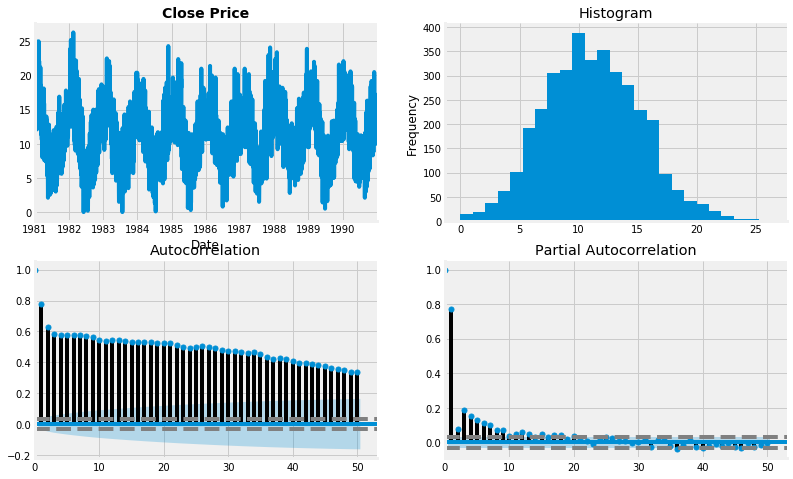

In [93]:
#after first-order differencing for GOOGLE Stock Open Price

tsplot2(temperatures['Daily Min. Temp.'], 'Close Price', lags=50, figsize=(12, 8));

In [ ]:
#continue with facebook prophet, LSTM, RNNs, VARMAX, SARIMAX, and other basic ML models!
#then eventually deploy on the web....using APIs? Receive real life data via an API call?
#this notebook will be updated in the near future...